In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("laptop_price.csv", encoding="latin-1")

In [ ]:
df

In [ ]:
df = df.drop("Product", axis=1)

In [ ]:
df = df.join(pd.get_dummies(df.Company))
df = df.drop("Company", axis=1)

In [39]:
df = df.join(pd.get_dummies(df.TypeName))
df = df.drop("TypeName", axis=1)

In [ ]:
df

In [ ]:
df["ScreenResolution"] = df.ScreenResolution.str.split(" ").apply(lambda x: x[-1])
df["Screen Width"] = df.ScreenResolution.str.split("x").apply(lambda x: x[0])
df["Screen Height"] = df.ScreenResolution.str.split("x").apply(lambda x: x[1])

In [ ]:
df = df.drop("ScreenResolution", axis=1)

In [12]:
df["CPU Brand"] = df.Cpu.str.split(" ").apply(lambda x: x[0])
df["CPU Frequency"] = df.Cpu.str.split(" ").apply(lambda x: x[-1])

In [14]:
df = df.drop("Cpu", axis=1)

In [15]:
df["CPU Frequency"] = df["CPU Frequency"].str[:-3]

In [16]:
df["Ram"] = df["Ram"].str[:-2]

In [17]:
df["Ram"] = df["Ram"].astype("int")
df["CPU Frequency"] = df["CPU Frequency"].astype("float")

In [18]:
df["Screen Width"] = df["Screen Width"].astype("int")
df["Screen Height"] = df["Screen Height"].astype("int")

In [19]:
df["Memory Amount"] = df.Memory.str.split(" ").apply(lambda x: x[0])
df["Memory Type"] = df.Memory.str.split(" ").apply(lambda x: x[1])

In [22]:
df['Memory Type'].value_counts()

Memory Type
SSD       843
HDD       375
Flash      75
Hybrid     10
Name: count, dtype: int64

In [23]:
def turn_memory_into_MB(value):
    if "GB" in value:
        return float(value[:value.find("GB")]) * 1000
    elif "TB" in value:
        return float(value[:value.find("TB")]) * 1000000

In [24]:
df["Memory Amount"] = df["Memory Amount"].apply(turn_memory_into_MB)

In [25]:
df = df.drop("Memory", axis=1)

In [26]:
df["Weight"] = df["Weight"].str[:-2]

In [27]:
df["Weight"] = df["Weight"].astype("float")

In [28]:
df["GPU Brand"] = df.Gpu.str.split(" ").apply(lambda x: x[0])

In [29]:
df = df.drop("Gpu", axis=1)

In [30]:
df = df.join(pd.get_dummies(df.OpSys))
df = df.drop("OpSys", axis=1)

In [34]:
cpu_categories = pd.get_dummies(df["CPU Brand"])
cpu_categories.columns = [col + "_CPU" for col in cpu_categories.columns]

df = df.join(cpu_categories)
df = df.drop("CPU Brand", axis=1)

In [35]:
gpu_categories = pd.get_dummies(df["GPU Brand"])
gpu_categories.columns = [col + "_GPU" for col in gpu_categories.columns]

df = df.join(gpu_categories)
df = df.drop("GPU Brand", axis=1)

In [44]:
df.corr()

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,AMD_GPU,ARM_GPU,Intel_GPU,Nvidia_GPU,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
laptop_ID,1.000000,-0.087796,-0.028607,-0.011798,0.067830,-0.057721,-0.119585,-0.044252,-0.043348,-0.013628,...,-0.089050,0.039920,0.094479,-0.037596,0.066227,0.032384,0.058880,-0.049769,-0.040689,0.001167
Inches,-0.087796,1.000000,0.237993,0.827631,0.068197,0.009435,-0.158850,0.112766,-0.017426,0.045288,...,0.207023,-0.052816,-0.592264,0.486561,-0.314691,0.402666,-0.314030,0.246907,-0.417950,0.098893
Ram,-0.028607,0.237993,1.000000,0.383874,0.743007,-0.138432,0.023950,0.088634,-0.035117,0.082241,...,-0.093119,-0.023894,-0.319551,0.415464,0.017560,0.481728,-0.102976,-0.416486,0.087470,0.062353
Weight,-0.011798,0.827631,0.383874,1.000000,0.210370,0.056444,-0.138191,0.101332,-0.022536,0.088465,...,0.106519,-0.037026,-0.596378,0.565232,-0.236693,0.591756,-0.154059,0.034893,-0.439952,0.097031
Price_euros,0.067830,0.068197,0.743007,0.210370,1.000000,-0.208349,0.080688,-0.010376,-0.055646,0.048509,...,-0.199415,-0.018431,-0.184205,0.348797,0.072675,0.375789,-0.097572,-0.549248,0.255658,0.249752
Acer,-0.057721,0.009435,-0.138432,0.056444,-0.208349,1.000000,-0.037497,-0.108831,-0.014074,-0.159187,...,-0.034859,-0.008119,0.005305,0.020848,-0.015336,-0.064096,0.062698,0.117594,-0.091450,-0.044202
Apple,-0.119585,-0.158850,0.023950,-0.138191,0.080688,-0.037497,1.000000,-0.047544,-0.006148,-0.069542,...,0.001749,-0.003547,0.078028,-0.085183,-0.040950,-0.055302,-0.017901,-0.143788,0.304167,-0.019310
Asus,-0.044252,0.112766,0.088634,0.101332,-0.010376,-0.108831,-0.047544,1.000000,-0.017845,-0.201839,...,-0.073770,-0.010295,-0.106654,0.170742,-0.013546,0.188172,0.016599,-0.100149,-0.024773,-0.056045
Chuwi,-0.043348,-0.017426,-0.035117,-0.022536,-0.055646,-0.014074,-0.006148,-0.017845,1.000000,-0.026102,...,-0.019232,-0.001331,0.043093,-0.031972,-0.015370,-0.020757,-0.006719,0.042760,-0.020214,-0.007248
Dell,-0.013628,0.045288,0.082241,0.088465,0.048509,-0.159187,-0.069542,-0.201839,-0.026102,1.000000,...,0.190722,-0.015058,-0.075707,-0.060187,0.015253,-0.033798,-0.049322,-0.002612,0.022132,0.054442


<Axes: >

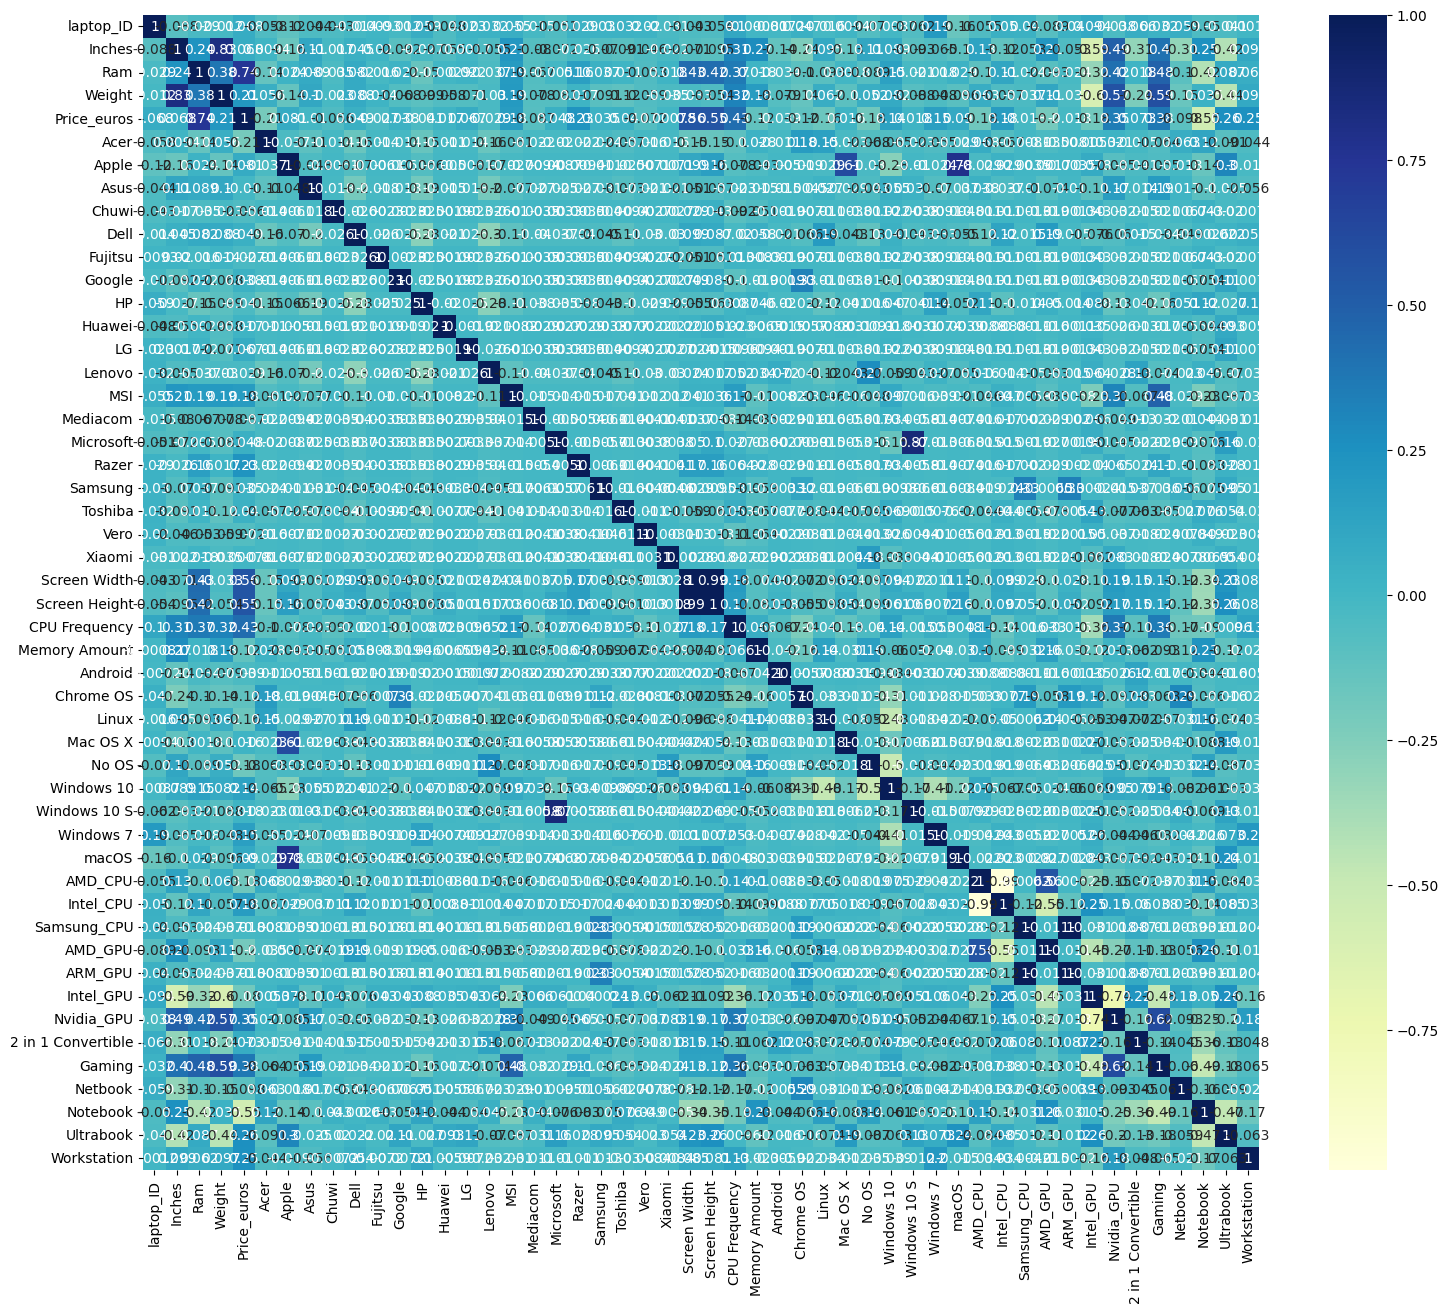

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [ ]:
# Ensure that Price_euros is numeric
df['Price_euros'] = pd.to_numeric(df['Price_euros'], errors='coerce')

# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Calculate correlations
target_correlations = numeric_df.corr()['Price_euros'].apply(abs).sort_values()


In [ ]:
target_correlations

In [ ]:
selected_features = target_correlations[-21:].index

In [ ]:
selected_features = list(selected_features)

In [ ]:
selected_features

In [ ]:
limited_df = df[selected_features]

In [ ]:
limited_df

In [ ]:
plt.figure(figsize=(18, 15))
sns.heatmap(limited_df.corr(), annot=True, cmap="YlGnBu")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = limited_df.drop("Price_euros", axis=1), limited_df["Price_euros"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
forest = RandomForestRegressor()

forest.fit(X_train_scaled, y_train)

In [ ]:
forest.score(X_test_scaled, y_test)

In [ ]:
y_pred = forest.predict(X_test_scaled)

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(y_pred, y_test)
plt.plot(range(0, 6000), range(0, 6000), c="green")


In [ ]:
X_new_scaled = scaler.transform([X_test.iloc[0]])

In [ ]:
forest.predict(X_new_scaled)

In [ ]:
y_test.iloc[0]